# Brownian Motion

## Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import mode

## Part 1. Simulate a single 1d random walk until absorption.

The starting point is -50
The Absorption point is 50
Number of steps taken: 8441
The minimum value is -50
The maximum value is 50


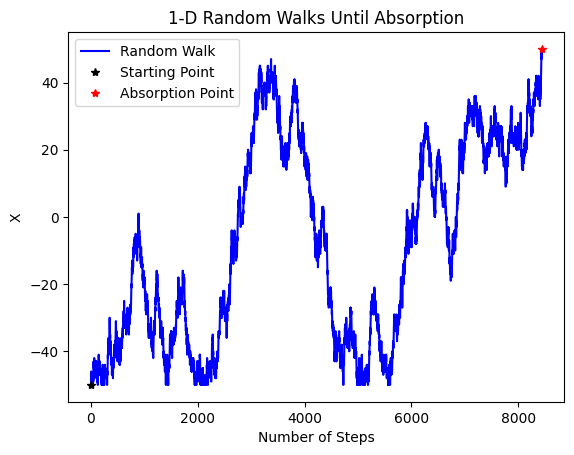

In [42]:
x = -50       # Initialize starting point to -50.
BOUNDARY = 50
x_position = np.array([x])
step = np.array([-1, 1])

while x != 50:  # Set a while loop so that it breaks once 50 i.e. the point of absorption is reached.
    step_choice = np.random.choice(step, p=[0.5, 0.5])
    x += step_choice

    # Ensure x stays within the range [-50, 50]
    if x < -BOUNDARY:
        x = -BOUNDARY
    elif x > BOUNDARY:
        x = BOUNDARY

    x_position = np.append(x_position, x)  # Append the new value of x to the array.

    if x == BOUNDARY:  # If x == 50, the simulation ends
        break

# Print results
print(f'The starting point is {x_position[0]}')
print(f'The Absorption point is {x_position[-1]}')
print(f'Number of steps taken: {len(x_position)}')
print(f'The minimum value is {min(x_position)}')
print(f'The maximum value is {max(x_position)}')

# Plot the random walk
steps = range(len(x_position))  # Creates an axis for the number of steps in the plot below.
start = x_position[:1]
stop = x_position[-1:]
plt.plot(steps, x_position, 'b')
plt.title("1-D Random Walks Until Absorption")
plt.xlabel('Number of Steps')
plt.ylabel('X')
plt.plot(steps[:1], start, 'k*')  # Starting point
plt.plot(steps[-1:], stop, 'r*')  # Absorption point
plt.legend(['Random Walk', 'Starting Point', 'Absorption Point'])
plt.show()

## Part 2. Simulate a single 2d random walk until absorption.


The Absorption point is (X, Y) = (50, 0)
Number of steps taken: 39454
Min X: -50, Min Y: -50
Max X: 50, Max Y: 50


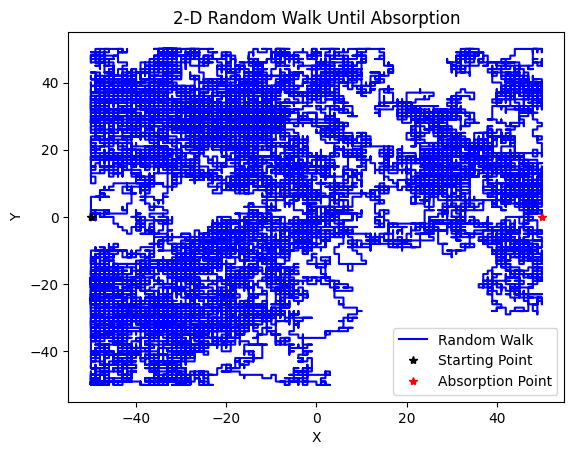

In [20]:
x, y = -50, 0
x_position = np.array([x])
y_position = np.array([y])
rng = np.random.default_rng()  # Create a random number generator

BOUNDARY = 50

while x != BOUNDARY or y != 0:
    direction = rng.integers(4)  # Randomly choose a direction (0: up, 1: down, 2: left, 3: right)

    if direction == 0 and x < BOUNDARY:
        x += 1
    elif direction == 1 and y < BOUNDARY:
        y += 1
    elif direction == 2 and x > -BOUNDARY:
        x -= 1
    elif direction == 3 and y > -BOUNDARY:
        y -= 1

    x_position = np.append(x_position, x)  # Append the new value of x to the array.
    y_position = np.append(y_position, y)  # Append the new value of y to the array.   


# Print summary statistics
print(f'\nThe Absorption point is (X, Y) = ({x_position[-1]}, {y_position[-1]})')
print(f'Number of steps taken: {len(x_position)}')
print(f'Min X: {x_position.min()}, Min Y: {y_position.min()}')
print(f'Max X: {x_position.max()}, Max Y: {y_position.max()}')

# Plot the random walk
plt.plot(x_position, y_position, 'b', label="Random Walk")
plt.title("2-D Random Walk Until Absorption")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_position[0], y_position[0], 'k*', label="Starting Point")  # Starting point
plt.plot(x_position[-1], y_position[-1], 'r*', label="Absorption Point")  # Absorption point
plt.legend(['Random Walk', 'Starting Point', 'Absorption Point'])
plt.show()     

## Part 3. Simulate many random walks and get some statistics.

In [33]:
def statistics(N):
    """Function to calculate the statistics of several random walks."""

    runs = np.array([])  # Initialize an empty array to store the runs.

    for i in range(N):
        x, y = -50, 0
        x_position = np.array([x])
        y_position = np.array([y])
        rng = np.random.default_rng()  # Create a random number generator

        BOUNDARY = 50

        while x != BOUNDARY or y != 0:
            direction = rng.integers(4)  # Randomly choose a direction (0: up, 1: down, 2: left, 3: right)

            if direction == 0 and x < BOUNDARY:
                x += 1
            elif direction == 1 and y < BOUNDARY:
                y += 1
            elif direction == 2 and x > -BOUNDARY:
                x -= 1
            elif direction == 3 and y > -BOUNDARY:
                y -= 1

            x_position = np.append(x_position, x)  # Append the new value of x to the array.
            y_position = np.append(y_position, y)  # Append the new value of y to the array.   
        
        step_numbers = len(x_position)  # Number of steps taken in the random walk.
        runs = np.append(runs, step_numbers)  # Append the number of steps to the statistics array.
    return runs  # Return the array of runs.


Mean: 44221.4
Standard Deviation: 24351.848230473184
Variance: 593012512.24
Median: 31464.0
Maximum: 86247.0
Minimum: 13623.0
Range: 72624.0
Mode: 13623.0



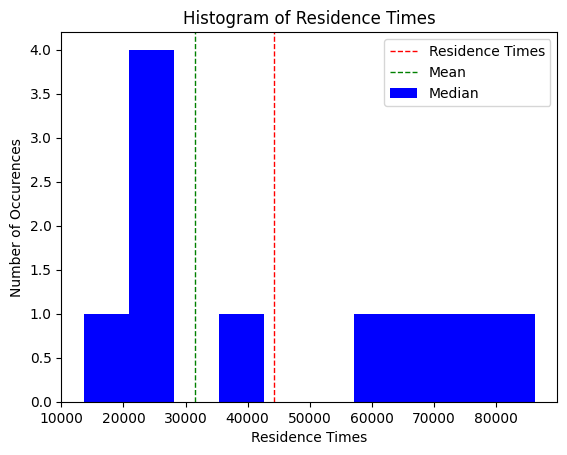

In [ ]:
# Generate data
simulation_1_results = statistics(100)

# Calculate statistics
mean = np.mean(simulation_1_results)
std_dev = np.std(simulation_1_results)
variance = np.var(simulation_1_results)
median = np.median(simulation_1_results)
maximum = np.max(simulation_1_results)
minimum = np.min(simulation_1_results)
mode = mode(simulation_1_results)[0]

# Print statistics
print(f'''
Mean: {mean}
Standard Deviation: {std_dev}
Variance: {variance}
Median: {median}
Maximum: {maximum}
Minimum: {minimum}
Range: {maximum - minimum}
Mode: {mode}
''')
plt.hist(simulation_1_results, color = 'blue')
plt.title('Histogram of Residence Times')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend(['Residence Times', "Mean", "Median"])
plt.show()


 Mean: 65126.32
 Standard Deviation: 58127.19764736298 
 Variance: 3378771106.3356
 Median: 47144.0



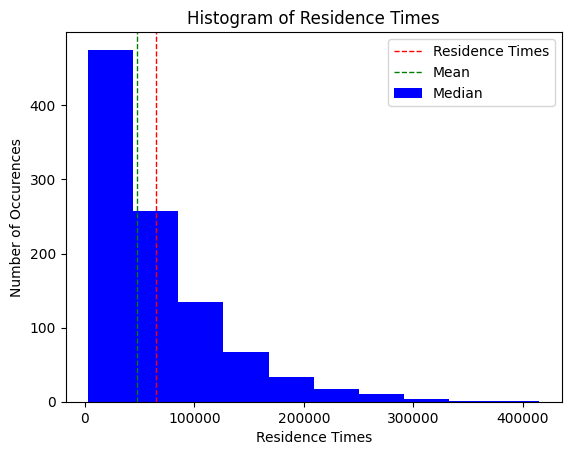

In [ ]:
# Generate data
simulation_2_results = statistics(1000)

# Calculate statistics
mean = np.mean(simulation_2_results)
std_dev = np.std(simulation_2_results)
variance = np.var(simulation_2_results)
median = np.median(simulation_2_results)
maximum = np.max(simulation_2_results)
minimum = np.min(simulation_2_results)
mode = mode(simulation_2_results)[0]

# Print statistics
print(f'''
Mean: {mean}
Standard Deviation: {std_dev}
Variance: {variance}
Median: {median}
Maximum: {maximum}
Minimum: {minimum}
Range: {maximum - minimum}
Mode: {mode}
''')

plt.hist(simulation_2_results, color = 'blue')
plt.title('Histogram of Residence Times')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend(['Residence Times', "Mean", "Median"])
plt.show()

# Range y=-25 to y=25


The Absorption point is (X, Y) = (50, 21)
Number of steps taken: 7054
Min X: -50, Min Y: -22
Max X: 50, Max Y: 50


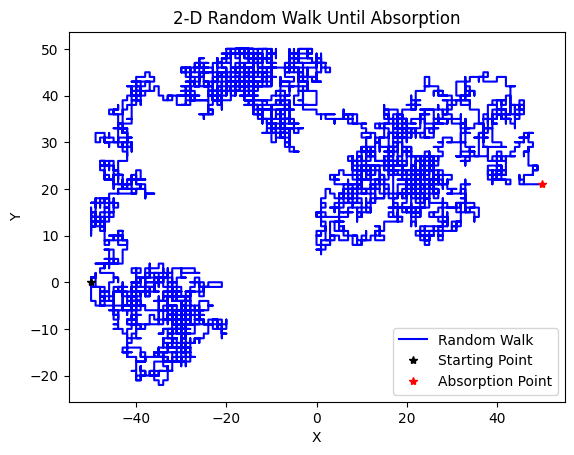

In [36]:
x, y = -50, 0
x_position = np.array([x])
y_position = np.array([y])
rng = np.random.default_rng()  # Create a random number generator

BOUNDARY = 50

while x != BOUNDARY or y not in range(-25, 26):
    direction = rng.integers(4)  # Randomly choose a direction (0: up, 1: down, 2: left, 3: right)

    if direction == 0 and x < BOUNDARY:
        x += 1
    elif direction == 1 and y < BOUNDARY:
        y += 1
    elif direction == 2 and x > -BOUNDARY:
        x -= 1
    elif direction == 3 and y > -BOUNDARY:
        y -= 1

    x_position = np.append(x_position, x)  # Append the new value of x to the array.
    y_position = np.append(y_position, y)  # Append the new value of y to the array.   


# Print summary statistics
print(f'\nThe Absorption point is (X, Y) = ({x_position[-1]}, {y_position[-1]})')
print(f'Number of steps taken: {len(x_position)}')
print(f'Min X: {x_position.min()}, Min Y: {y_position.min()}')
print(f'Max X: {x_position.max()}, Max Y: {y_position.max()}')

# Plot the random walk
plt.plot(x_position, y_position, 'b', label="Random Walk")
plt.title("2-D Random Walk Until Absorption")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_position[0], y_position[0], 'k*', label="Starting Point")  # Starting point
plt.plot(x_position[-1], y_position[-1], 'r*', label="Absorption Point")  # Absorption point
plt.legend(['Random Walk', 'Starting Point', 'Absorption Point'])
plt.show() 

In [39]:
def statistics_range_25(N):
    """Function to calculate the statistics of several random walks."""

    runs = np.array([])  # Initialize an empty array to store the runs.

    for i in range(N):
        x, y = -50, 0
        x_position = np.array([x])
        y_position = np.array([y])
        rng = np.random.default_rng()  # Create a random number generator

        BOUNDARY = 50

        while x != BOUNDARY or y not in range(-25, 26):
            direction = rng.integers(4)  # Randomly choose a direction (0: up, 1: down, 2: left, 3: right)

            if direction == 0 and x < BOUNDARY:
                x += 1
            elif direction == 1 and y < BOUNDARY:
                y += 1
            elif direction == 2 and x > -BOUNDARY:
                x -= 1
            elif direction == 3 and y > -BOUNDARY:
                y -= 1

            x_position = np.append(x_position, x)  # Append the new value of x to the array.
            y_position = np.append(y_position, y)  # Append the new value of y to the array.   
        
        step_numbers = len(x_position)  # Number of steps taken in the random walk.
        runs = np.append(runs, step_numbers)  # Append the number of steps to the statistics array.
    return runs  # Return the array of runs.


Mean: 24082.48
Standard Deviation: 19938.1852546715
Variance: 397531231.24960005
Median: 18783.0
Maximum: 113614.0
Minimum: 1685.0
Range: 111929.0



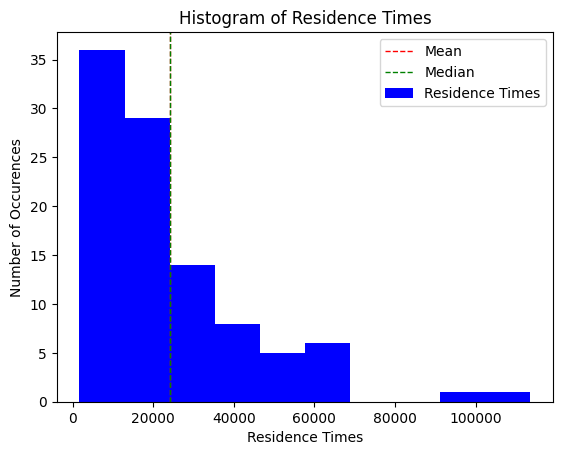

In [ ]:
# Generate data
simulation_3_results = statistics_range_25(100)

# Calculate statistics
mean = np.mean(simulation_3_results )
std_dev = np.std(simulation_3_results )
variance = np.var(simulation_3_results )
median = np.median(simulation_3_results )
maximum = np.max(simulation_3_results )
minimum = np.min(simulation_3_results )
mode = mode(simulation_3_results)[0]

# Print statistics
print(f'''
Mean: {mean}
Standard Deviation: {std_dev}
Variance: {variance}
Median: {median}
Maximum: {maximum}
Minimum: {minimum}
Range: {maximum - minimum}
Mode: {mode}
''')

plt.hist(simulation_3_results , color = 'blue')
plt.title('Histogram of Residence Times')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend(["Mean", "Median", "Residence Times"])
plt.show()


 Mean: 23796.398
 Standard Deviation: 18679.36209477176


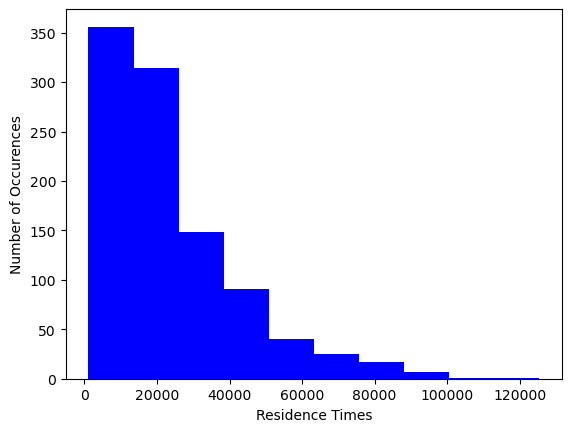

In [ ]:
# Generate data
simulation_4_results = statistics_range_25(1000)

# Calculate statistics
mean = np.mean(simulation_4_results)
std_dev = np.std(simulation_4_results)
variance = np.var(simulation_4_results)
median = np.median(simulation_4_results)
maximum = np.max(simulation_4_results)
minimum = np.min(simulation_4_results)
mode = mode(simulation_4_results)[0]

# Print statistics
print(f'''
Mean: {mean}
Standard Deviation: {std_dev}
Variance: {variance}
Median: {median}
Maximum: {maximum}
Minimum: {minimum}
Range: {maximum - minimum}
Mode: {mode}
''')

plt.hist(simulation_4_results, color = 'blue')
plt.title('Histogram of Residence Times')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend(['Residence Times', "Mean", "Median"])
plt.show()